In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# load data
greedy_df = pd.read_csv('../gene_hpo_ration_snowballig.greedy.tsv',sep='\t')
walktrap_df = pd.read_csv('../gene_hpo_ration_snowballig.walktrap.tsv',sep='\t')
info_df = pd.read_csv('../gene_hpo_ration_snowballig.cesna.tsv',sep='\t')
cesna_df = pd.read_csv('../gene_hpo_ration_snowballig.infomap.tsv',sep='\t')
print(cesna_df.columns)

Index(['com_id', 'com_score', 'replicate_id', 'replicate_score',
       'rep_and_com_size', 'replicate_g2h', 'com_g2h'],
      dtype='object')


In [11]:
# filter non-trivial coms
print(cesna_df.columns)
def clean(df):
    print(df.shape)
    cleaned_df = df[df['rep_and_com_size'] > 3]
    cleaned_df = cleaned_df[cleaned_df['com_g2h'] != 0]
    cleaned_df = cleaned_df[cleaned_df['com_g2h'] != 1]
    print(cleaned_df.shape)
    return cleaned_df

cleaned_greedy_df = clean(greedy_df)
cleaned_walktrap_df = clean(walktrap_df)
cleaned_info_df = clean(info_df)
cleaned_cesna_df = clean(cesna_df)

Index(['com_id', 'com_score', 'replicate_id', 'replicate_score',
       'rep_and_com_size', 'replicate_g2h', 'com_g2h'],
      dtype='object')
(18290, 7)
(4410, 7)
(8040, 7)
(970, 7)
(284710, 7)
(21950, 7)
(38550, 7)
(2790, 7)


0
paris-greedy
1
paris-walktrap
2
paris-infomap
3
paris-cesna


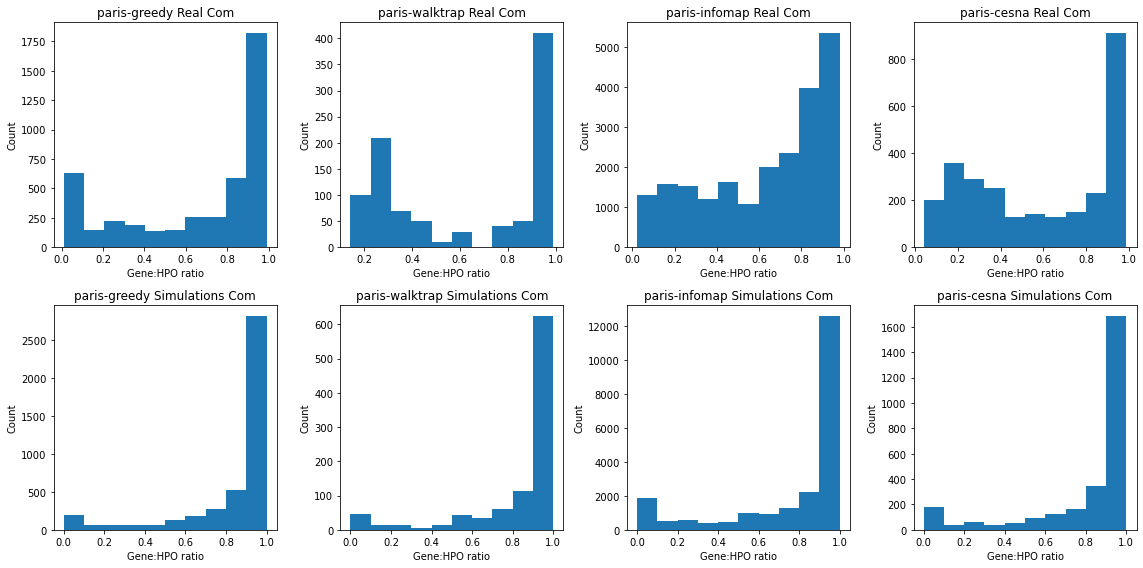

In [20]:
# plot the distributions of the 4

fig, axes = plt.subplots(2,4)
fig.set_size_inches(16,8)
dfs = [cleaned_greedy_df,cleaned_walktrap_df,cleaned_info_df,cleaned_cesna_df]
algos = ['paris-greedy','paris-walktrap','paris-infomap','paris-cesna']
for i,(df,algo) in enumerate(zip(dfs,algos)):
    print(i)
    print(algo)
    axes[0][i].hist(df['com_g2h'])
    axes[1][i].hist(df['replicate_g2h'])
    axes[0][i].set_title(algo + ' Real Com')
    axes[1][i].set_title(algo + ' Simulations Com')
    axes[0][i].set_xlabel('Gene:HPO ratio')
    axes[1][i].set_xlabel('Gene:HPO ratio')
    axes[0][i].set_ylabel('Count')
    axes[1][i].set_ylabel('Count')
plt.tight_layout()
plt.savefig('../Figures/g2p_ratio_snowballing.png')
plt.show()
    